<a href="https://colab.research.google.com/github/plumwiserim/data-analysis/blob/main/part2(20200720).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Plots

In [ ]:
# 그래프를 Cell 사이에 출력하겠다.
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## Line Plot

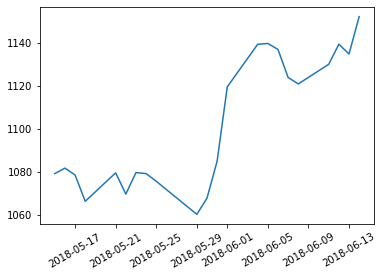

In [ ]:
# 판다스로 데이터 처리
stock = pd.read_csv('data/part2_visual_GOOG.csv', header=None, delimiter=',')
stock.columns = ['Date','Price']
stock['Date'] = pd.to_datetime(stock['Date'], format='%d-%m-%Y')  
indexed_stock = stock.set_index('Date') 
ts = indexed_stock['Price']

# 그래프 그리기
plt.plot(ts)
plt.xticks(rotation=30)

# 화면에 출력
plt.show();

## Bar Chart

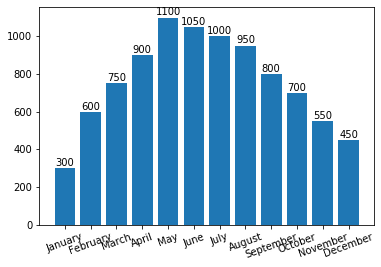

In [ ]:
import numpy as np
import calendar

# 데이터 처리
month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
units_sold = [300, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]

# 그래프 그리기
fig, ax = plt.subplots()

plt.xticks(month_num, calendar.month_name[1:13], rotation=20)

plot = ax.bar(month_num, units_sold)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')

# 화면 출력
plt.show();

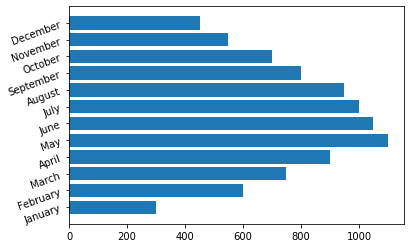

In [ ]:
plt.yticks(month_num, calendar.month_name[1:13], rotation=20)
plot = plt.barh(month_num, units_sold)
plt.show();

## Scatter Plot

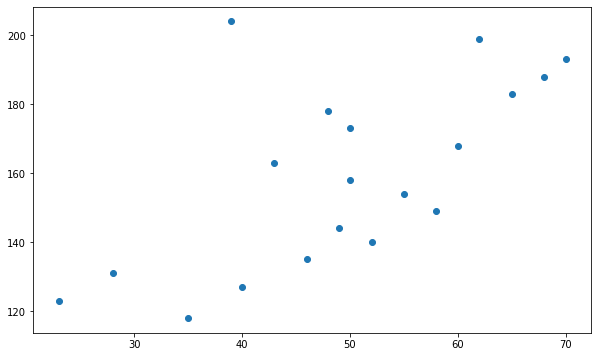

In [ ]:
plt.figure(figsize=(10,6))
age_weight = pd.read_excel('data/part2_visual_scatter_ex.xlsx', 'age_weight')

x = age_weight['age']
y = age_weight['weight']

plt.scatter(x, y)
plt.show();

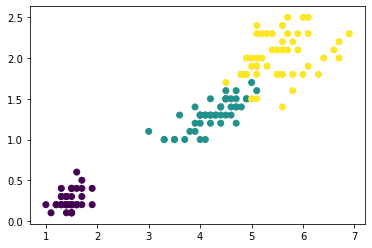

In [ ]:
iris = pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})

plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)
plt.show();

## Bubble Plot

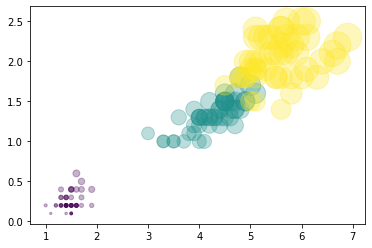

In [ ]:
plt.scatter(iris.petal_length, iris.petal_width, s=50*iris.petal_length*iris.petal_width, c=iris.species, alpha=0.3)
plt.show();

## Stacked Plot

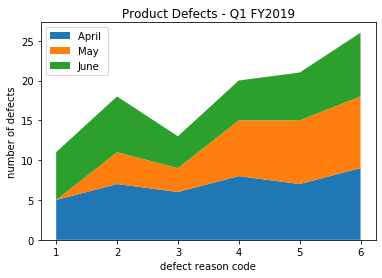

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6], dtype=np.int32)
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

labels = ["April ", "May", "June"]

fig, ax = plt.subplots()
ax.stackplot(x, Apr, May, June, labels=labels)
ax.legend(loc=2)

plt.xlabel('defect reason code')
plt.ylabel('number of defects')
plt.title('Product Defects - Q1 FY2019')

plt.show();

## Pie Plot

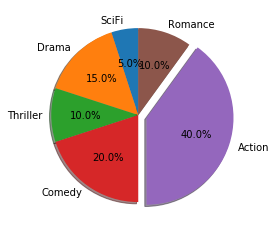

In [ ]:
labels = ['SciFi', 'Drama', 'Thriller', 'Comedy', 'Action', 'Romance']
sizes = [5, 15, 10, 20, 40, 10]
explode = (0, 0, 0, 0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

## Table Chart

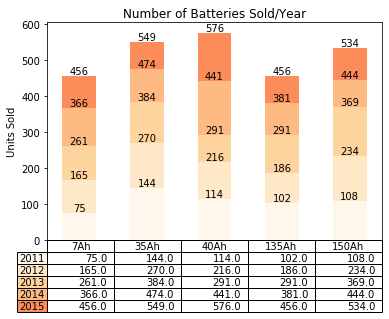

In [ ]:
# 데이터
rows = ['2011', '2012', '2013', '2014', '2015']
columns = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')
data = [[75, 144, 114, 102, 108],
        [90, 126, 102,  84, 126],
        [96, 114,  75, 105, 135],
        [105, 90, 150,  90,  75],
        [90,  75, 135,  75,  90]]
values = np.arange(0, 600, 100)
index = np.arange(len(columns)) + 0.3
n_rows = len(data)
bar_width = 0.5
y_offset = np.zeros(len(columns))

# 그래프 그리기
fig, ax = plt.subplots()

colors = plt.cm.OrRd(np.linspace(0, 0.5, len(rows)))
cell_text = []

for row in range(n_rows):
    plot = plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
    for rect in plot:
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' % int(y_offset[i]), ha='center', va='bottom')
        i = i+1

the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

plt.ylabel("Units Sold")
plt.title('Number of Batteries Sold/Year')
plt.xticks([])

# 출력
plt.show()

## Polar Plot

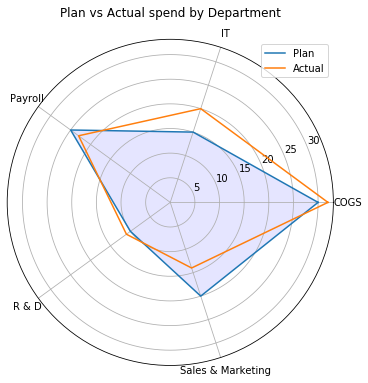

In [ ]:
Depts = ["COGS","IT","Payroll","R & D", "Sales & Marketing"]

rp = [30, 15, 25, 10, 20, 30]
ra = [32, 20, 23, 11, 14, 32]

plt.figure(figsize=(10,6))

plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(rp))

(lines,labels) = plt.thetagrids(range(0,360, int(360/len(Depts))), (Depts))

plt.plot(theta, rp)
plt.fill(theta, rp, 'b', alpha=0.1)
plt.plot(theta, ra)
plt.legend(labels=('Plan','Actual'),loc=1)
plt.title("Plan vs Actual spend by Department")

plt.show();

## Histogram Plot

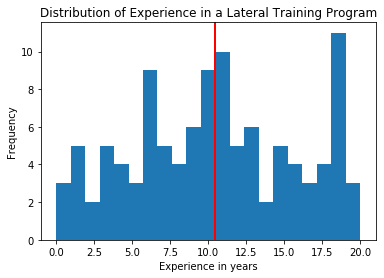

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [ ]:
grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

nbins = 21
n, bins, patches = plt.hist(grp_exp, bins = nbins)

plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of Experience in a Lateral Training Program")

plt.axvline(x=grp_exp.mean(), linewidth=2, color = 'r') 
plt.show();

print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

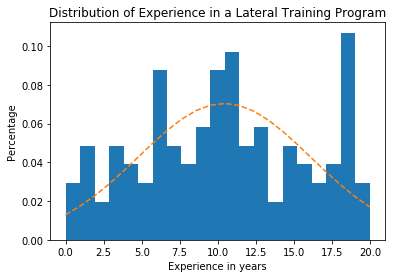

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [ ]:
grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

nbins = 21

n, bins, patches = plt.hist(grp_exp, bins = nbins, density=1)

plt.xlabel("Experience in years")
plt.ylabel("Percentage")
plt.title("Distribution of Experience in a Lateral Training Program")

mu = grp_exp.mean()
sigma = grp_exp.std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plt.plot(bins, y, '--')
plt.show()

print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

## Box Plot

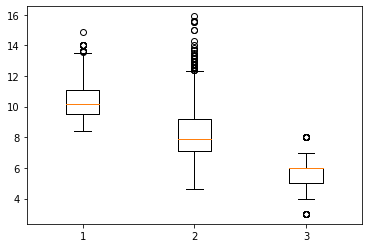

In [ ]:
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]
plt.boxplot(data)

plt.show()


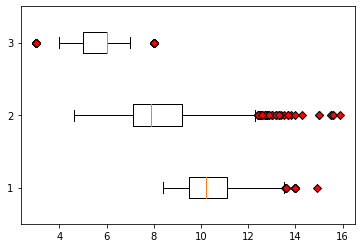

In [ ]:
plt.boxplot(data, vert=False, flierprops=dict(markerfacecolor='r', marker='D'))
plt.show();

## Violin Plot

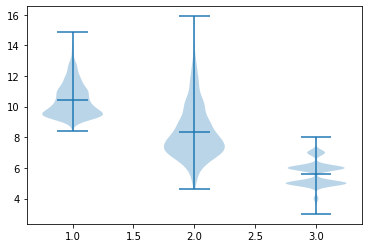

In [ ]:
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]
plt.violinplot(data, showmeans=True)

plt.show();

## Displaying Images with color bar(Heatmap)

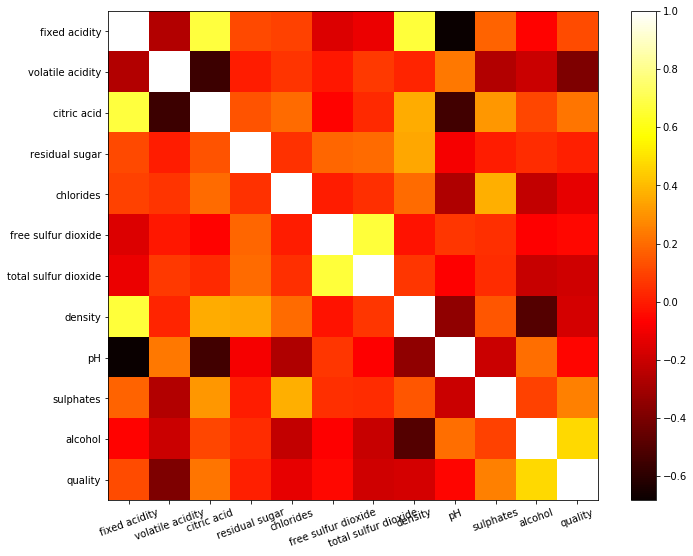

In [ ]:
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')

corr = wine_quality.corr()

plt.figure(figsize=(12,9))
plt.imshow(corr,cmap='hot');
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=20)
plt.yticks(range(len(corr)),corr.columns);

## Hinton Diagram

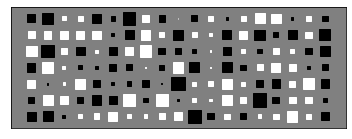

In [ ]:
matrix = np.asarray((pd.read_excel('data/part2_visual_weight_matrix.xlsx')))

fig, ax = plt.subplots()

max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for (x, y), w in np.ndenumerate(matrix):
    color = 'white' if w > 0 else 'black'
    size = np.sqrt(np.abs(w) / max_weight)
    rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                         facecolor=color, edgecolor=color)
    ax.add_patch(rect)

ax.autoscale_view()

plt.show()


## Contour Plot

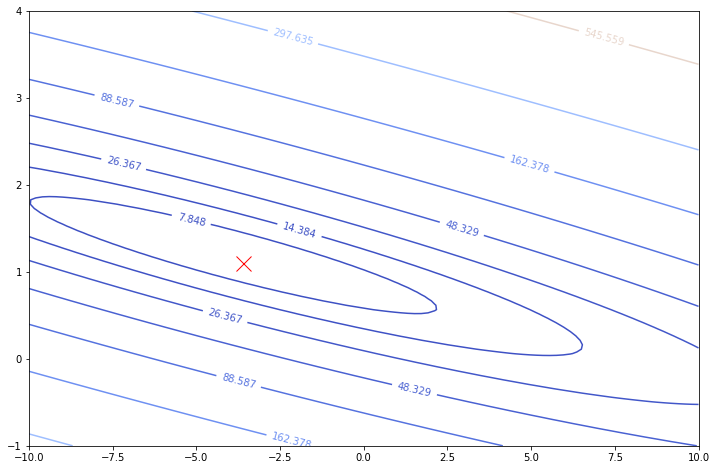

In [ ]:
from matplotlib import cm

Loss = pd.read_excel('data/part2_visual_Loss.xlsx')
theta0_vals = pd.read_excel('data/part2_visual_theta0.xlsx')
theta1_vals = pd.read_excel('data/part2_visual_theta1.xlsx')

fig = plt.figure(figsize=(12,8))
X, Y = np.meshgrid(theta0_vals, theta1_vals)
CS = plt.contour(X, Y, Loss, np.logspace(-2,3,20), cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)

# Plot the minimum point(Theta at Minimum cost)
theta = [-3.6, 1.1]
plt.plot(theta[0], theta[1], 'rx', markersize=15, linewidth=2)
plt.show()

## Triangulations

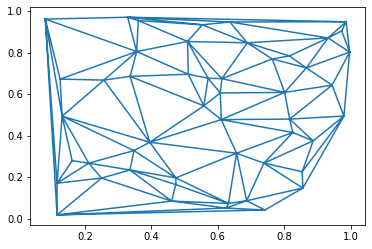

In [ ]:
import matplotlib.tri as tri

data = np.random.rand(50, 2)
triangles = tri.Triangulation(data[:,0], data[:,1])
plt.triplot(triangles)
plt.show()

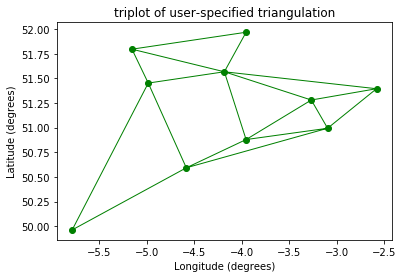

In [ ]:
xy = np.array([[-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
               [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
               [-0.090, 0.904], [-0.069, 0.907]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])
triangles = np.array([[1, 2, 3], [3, 4, 5], [4, 5, 6], [2, 5, 6], [6, 7, 8], [6, 8, 9], [0, 1, 7]])
plt.triplot(x, y, triangles, 'go-', lw=1.0)
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

## Stream Plot

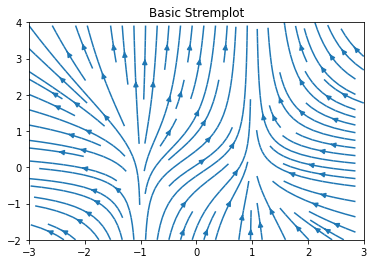

In [ ]:
import matplotlib.gridspec as gridspec

x, y = np.linspace(-3,3,100), np.linspace(-2,4,50)
X, Y = np.meshgrid(x, y)
U = 1 - X**2 
V = 1 + Y**2 
plt.streamplot(X, Y, U, V)
plt.title('Basic Stremplot')
plt.show()


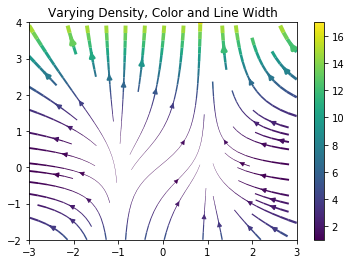

In [ ]:
# Define the speed as a function of U amd V
speed = np.sqrt(U*U + V*V)
#  Varying line width along a streamline
lw = 5*speed / speed.max()
strm = plt.streamplot(X, Y, U, V, density=[0.5, 1], color=V, linewidth=lw)
plt.colorbar(strm.lines)
plt.title('Varying Density, Color and Line Width')
plt.show()

# Plotting Multiple charts, subplots and figures

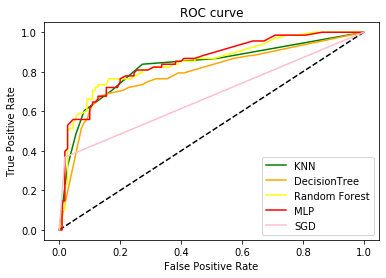

In [ ]:
fpr_KNN = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_KNN')
tpr_KNN = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_KNN')
fpr_MLP = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_MLP')
tpr_MLP = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_MLP')
fpr_SGD = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_SGD')
tpr_SGD = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_SGD')
fpr_RF = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_RF')
tpr_RF = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_RF')
fpr_DT = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_DT')
tpr_DT = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_DT')

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_KNN, tpr_KNN, label='KNN',color='green')
plt.plot(fpr_DT, tpr_DT, label='DecisionTree', color='orange')
plt.plot(fpr_RF, tpr_RF, label='Random Forest',color='yellow')
plt.plot(fpr_MLP, tpr_MLP, label='MLP',color='red')
plt.plot(fpr_SGD, tpr_SGD, label='SGD', color='pink')

# fpr_logreg = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_logreg')
# tpr_logreg = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_logreg')
# fpr_GNB = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_GNB')
# tpr_GNB = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_GNB')
# fpr_svc = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_svc')
# tpr_svc = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_svc')
# plt.plot(fpr_logreg, tpr_logreg, label='LogReg',color='purple')
# plt.plot(fpr_svc, tpr_svc, label='SVC',color='violet')
# plt.plot(fpr_GNB, tpr_GNB, label='GNB',color='grey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


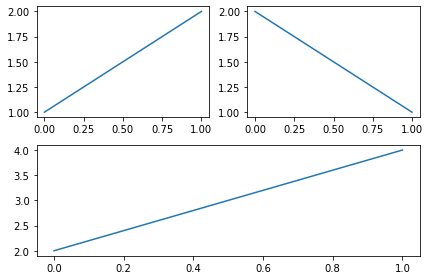

In [ ]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212) # 예가 이상하게 움직여! 그러니 이걸 기억해!

ax1.plot([1,2])
ax2.plot([2,1])
ax3.plot([2,4])

plt.tight_layout()
plt.show();


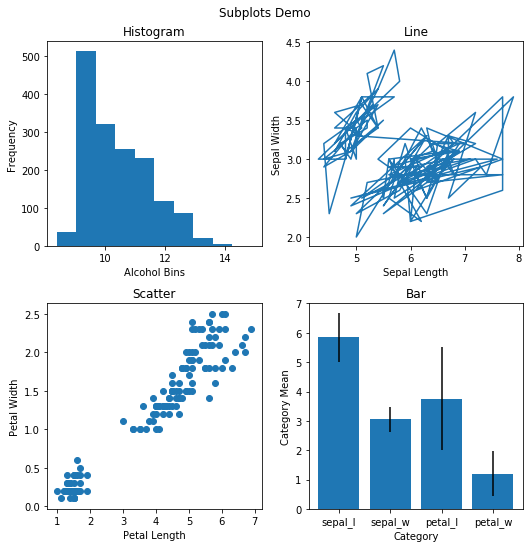

In [ ]:
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')
iris = pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')
iris_mean = iris.mean()
iris_std = iris.std()

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].hist(wine_quality['alcohol'])
axs[0, 0].set(title='Histogram', xlabel='Alcohol Bins', ylabel='Frequency')

axs[0, 1].plot(iris['sepal_length'], iris['sepal_width'])
axs[0, 1].set(title='Line', xlabel='Sepal Length', ylabel='Sepal Width')

axs[1, 0].scatter(iris['petal_length'], iris['petal_width'])
axs[1, 0].set(title='Scatter', xlabel='Petal Length', ylabel='Petal Width')

axs[1, 1].bar(['sepal_l','sepal_w', 'petal_l', 'petal_w'], iris_mean, yerr=iris_std)
axs[1, 1].set(title='Bar', xlabel='Category', ylabel='Category Mean')

plt.suptitle('Subplots Demo')
plt.tight_layout(pad=3, w_pad=1.0, h_pad=1.0)
plt.show()


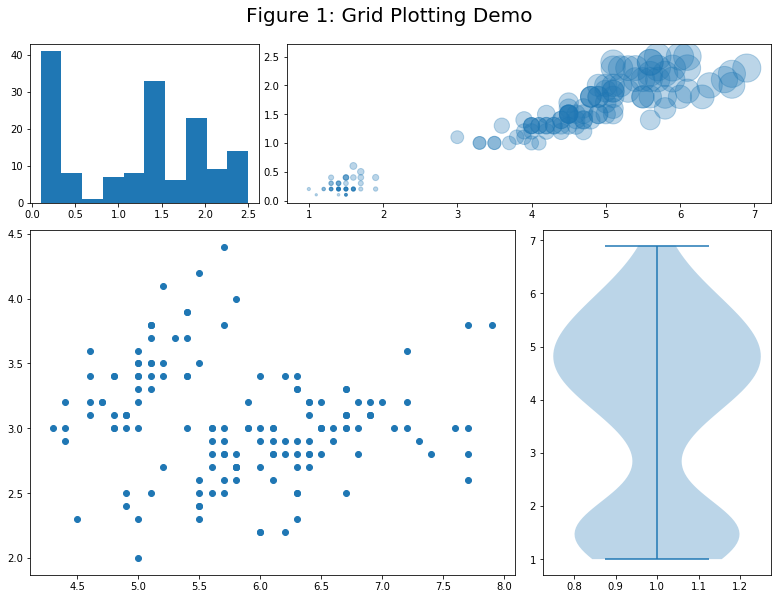

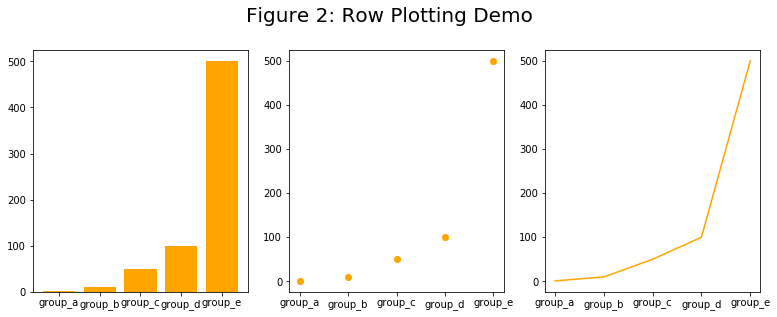

In [ ]:
plt.close('all')
iris = pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')

fig = plt.figure(1, figsize=(12, 9))

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax1.hist(iris['petal_width'])
ax2.scatter(iris['petal_length'], iris['petal_width'], 
            s=50*iris['petal_length']*iris['petal_width'], alpha=0.3)
ax3.scatter(iris['sepal_length'], iris['sepal_width'])
ax4.violinplot(iris['petal_length'])

plt.suptitle('Figure 1: Grid Plotting Demo', fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.figure(2, figsize=(12, 5))

names = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']
values = [1, 10, 50, 100, 500]

plt.subplot(131)
plt.bar(names, values, color='orange')

plt.subplot(132)
plt.scatter(names, values, color='orange')

plt.subplot(133)
plt.plot(names, values, color='orange')

plt.suptitle('Figure 2: Row Plotting Demo', fontsize=20)

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.show();


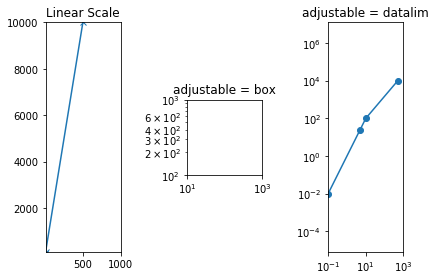

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot([0.1, 5, 10, 500], [0.01, 25, 100, 10000], "x-")
ax1.set(title="Linear Scale", xlim=(1e1, 1e3), ylim=(1e2, 1e4))

ax2.set(title="adjustable = box", xscale="log", yscale="log", xlim=(1e1, 1e3), 
        ylim=(1e2, 1e3), aspect=2)

ax3.plot([0.1, 5, 10, 500], [0.01, 25, 100, 10000], "o-")
ax3.set(title="adjustable = datalim", xscale="log", yscale="log", adjustable="datalim", 
        xlim=(1e-1, 1e3), ylim=(1e-2, 1e4), aspect=1)

plt.tight_layout()

plt.show()


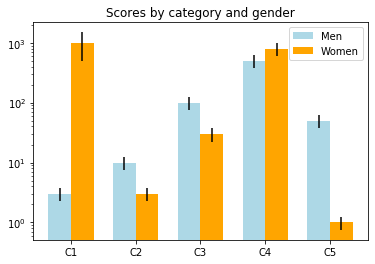

In [ ]:
menMeans = [3, 10, 100, 500, 50]
menStd = [0.75, 2.5, 25, 125, 12.5]

fig, ax = plt.subplots()
ind = np.arange(len(menMeans))                # the x locations for the groups
width = 0.35                                  # the width of the bars
p1 = ax.bar(ind, menMeans, width, color='lightblue', bottom=0, yerr=menStd)

womenMeans = [1000, 3, 30, 800, 1]
womenStd = [500, 0.75, 8, 200, 0.25]

p2 = ax.bar(ind + width, womenMeans, width, color='orange', bottom=0, yerr=womenStd)
ax.set_title('Scores by category and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C1', 'C2', 'C3', 'C4', 'C5'))

ax.set_yscale('log')
ax.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


# 시각화를 사용한 공공데이터 분석

## 프로젝트 설정

In [ ]:
# 1. 라이브러리 호출
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 시각화 설정
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# 3. 한글폰트를 설정(한글을 사용한다면 반드시해야 함)
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)
# 맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 4. 해상도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
df = pd.read_csv("data/part2_상가업소정보_201912_01.csv", sep='|')

In [ ]:
# 데이터 갯수 확인
df.shape

(573680, 39)

In [ ]:
# 첫부분
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [ ]:
# 끝부분
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


In [ ]:
df.index

RangeIndex(start=0, stop=573680, step=1)

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [ ]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 전처리

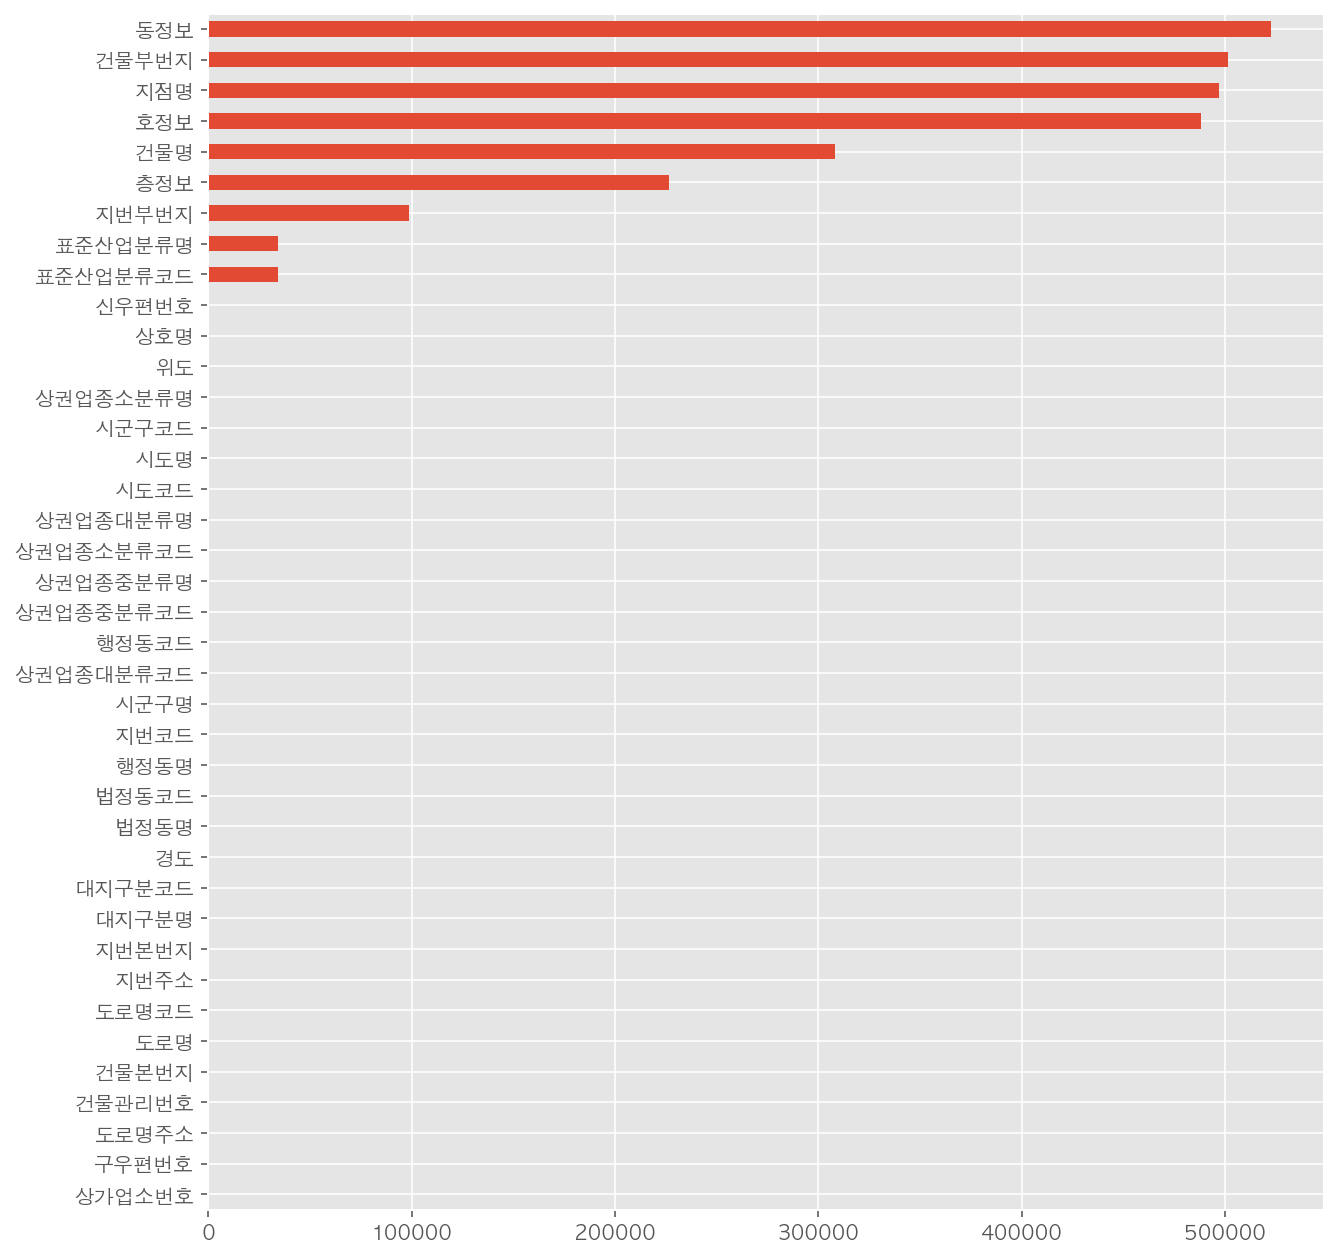

In [ ]:
# 결측 확인
n = df.isnull().sum()
n.sort_values().plot.barh(figsize=(10,11))

In [ ]:
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
df = df.drop(not_use_col, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   상권업종대분류코드  573680 non-null  object 
 3   상권업종대분류명   573680 non-null  object 
 4   상권업종중분류코드  573680 non-null  object 
 5   상권업종중분류명   573680 non-null  object 
 6   상권업종소분류코드  573680 non-null  object 
 7   상권업종소분류명   573680 non-null  object 
 8   시도코드       573680 non-null  int64  
 9   시도명        573680 non-null  object 
 10  시군구코드      573680 non-null  int64  
 11  시군구명       573680 non-null  object 
 12  행정동코드      573680 non-null  int64  
 13  행정동명       573680 non-null  object 
 14  법정동코드      573680 non-null  int64  
 15  법정동명       573680 non-null  object 
 16  지번코드       573680 non-null  int64  
 17  대지구분코드     573680 non-null  int64  
 18  대지구분명      573680 non-null  object 
 19  지번본번지      573680 non-n

In [ ]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [ ]:
# 코드와 번호가 포함된 컬럼명을 모두 삭제하고 싶습니다.
# 1) 코드만 지운다.
# 1-1) 컬러명에 코드가 포함된 글자가 있는 컬럼이 있는지 확인한다.(str.contains)
# 1-2) 확인된 컬럼을 모두 가져온다.
# 1-3) 지운다.
# 2) 번호만 지운다.
# 2-1) 컬러명에 코드가 포함된 글자가 있는 컬럼이 있는지 확인한다.(str.contains)
# 2-2) 확인된 컬럼을 모두 가져온다.
# 2-3_ 지운다.

In [ ]:
df = df.drop(cols[cols.str.contains("코드|번호")], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


In [ ]:
df[df['시군구명'] == '강남구']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,의료,병원,내과/외과,서울특별시,강남구,도곡2동,도곡동,대지,467,서울특별시 강남구 도곡동 467-14,서울특별시 강남구 언주로30길,39,서울특별시 강남구 언주로30길 39,127.053198,37.488742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573668,킹덤코리아,소매,음/식료품소매,청과물소매,서울특별시,강남구,역삼2동,역삼동,대지,720,서울특별시 강남구 역삼동 720-9,서울특별시 강남구 테헤란로38길,5,서울특별시 강남구 테헤란로38길 5,127.041635,37.501642
573672,심스틸러,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,논현1동,논현동,대지,16,서울특별시 강남구 논현동 16-40,서울특별시 강남구 강남대로146길,7,서울특별시 강남구 강남대로146길 7,127.020698,37.514833
573673,밀리온골프,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,압구정동,신사동,대지,648,서울특별시 강남구 신사동 648-8,서울특별시 강남구 도산대로49길,21,서울특별시 강남구 도산대로49길 21,127.036900,37.524247
573674,헤리티크뉴욕,소매,의복의류,예복/웨딩드레스,서울특별시,강남구,압구정동,신사동,대지,650,서울특별시 강남구 신사동 650-7,서울특별시 강남구 도산대로45길,16,서울특별시 강남구 도산대로45길 16-9,127.036036,37.523645


In [ ]:
df_gangnam = df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')].copy()
df_gangnam

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
39,마깐바냑,음식,분식,라면김밥분식,서울특별시,강남구,역삼1동,역삼동,대지,831,서울특별시 강남구 역삼동 831-45,서울특별시 강남구 역삼로,109,서울특별시 강남구 역삼로 109,127.031005,37.493653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573504,강남농수산,음식,일식/수산물,음식점-일식,서울특별시,강남구,세곡동,율현동,대지,108,서울특별시 강남구 율현동 108-9,서울특별시 강남구 헌릉로745길,25,서울특별시 강남구 헌릉로745길 25,127.119159,37.469284
573521,풍,음식,일식/수산물,음식점-일식,서울특별시,강남구,논현1동,논현동,대지,183,서울특별시 강남구 논현동 183-4,서울특별시 강남구 강남대로118길,20,서울특별시 강남구 강남대로118길 20,127.025047,37.506579
573545,올드캡,음식,패스트푸드,패스트푸드,서울특별시,강남구,논현2동,논현동,대지,234,서울특별시 강남구 논현동 234-2,서울특별시 강남구 논현로114길,10,서울특별시 강남구 논현로114길 10,127.034194,37.508564
573554,흑화당,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치2동,대치동,대지,989,서울특별시 강남구 대치동 989,서울특별시 강남구 삼성로,238,서울특별시 강남구 삼성로 238,127.061386,37.498629


In [ ]:
food_gu = df_gangnam.groupby(['상권업종중분류명'])['상호명'].count()

In [ ]:
food = food_gu.reset_index()
food = food.rename(columns={"상호명":"상호수"})
food

,상권업종중분류명,상호수
0,기타음식업,47
1,닭/오리요리,539
2,별식/퓨전요리,341
3,부페,63
4,분식,1197
5,양식,1573
6,유흥주점,1573
7,음식배달서비스,11
8,일식/수산물,1255
9,제과제빵떡케익,650


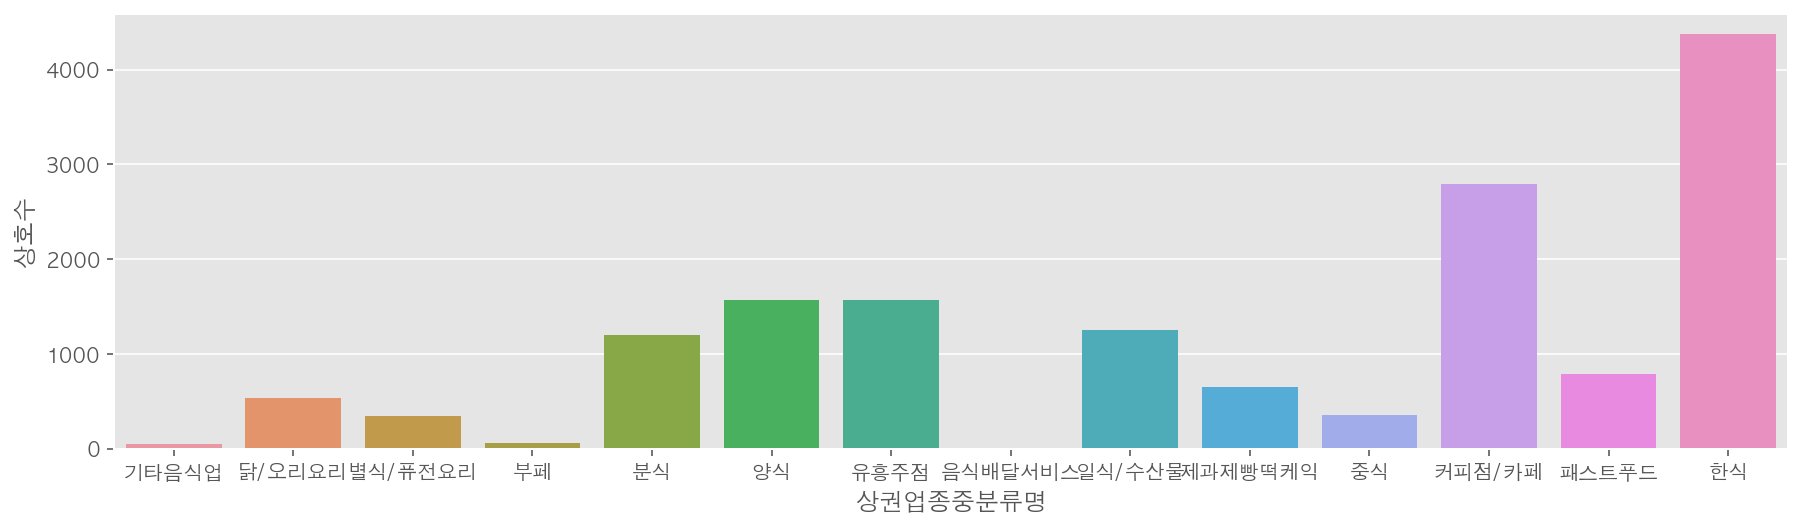

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x="상권업종중분류명", y="상호수")